# Python para Geociencias

### Víctor Rojas
#### vr.rojaspozo@gmail.com

Esto es parte de las notas de [**Python para Geociencias**](https://github.com/vrrp/Workshop2018Python)  

# 12. Procesamiento de datos del satélite geoestacionario GOES 16

GOES 16 es un satélite de órbita geoestacionaria y cuenta con los siguientes instrumentos de medición:

### The Geostationary Lightning Mapper (GLM)
Es el mapeador de rayos

### The Advanced Baseline Imager (ABI)
Instrumento que obtiene datos del clima, océano y medio ambiente

### Solar Ultraviolet Image (SUVI)
Es un telescopio que observa y caracteriza agujeros coronales, erupciones solares y eyecciones de masa coronal

### The Extreme Ultraviolet and X-ray Irradiance Sensor (EXIS)
Detecta y monitorea la radiación solar en la atmósfera superior

### The Space Environment in situ Suite (SEISS)
Monitorean los flujos de protones, electrones e iónes pesados en la magnetósfera desde la órbita geosincrónica.

### Magnetometer (MAG)
Proporciona mediciones del campo magnético del entorno espacial que controla la dinámica de partículas cargadas, en la región externa de la magnetósfera.

En esta lección se procesara los datos obtenidos por el sensor **ABI**. Cabe resaltar dicho instrumento cuenta con 16 canales, que abarcan las regiones del visible y el infrarrojo del espectro electromagnético, ver imagen.

<img src="./util/espectro-goes16.png" height="600" width="600">
Imágen tomado de: https://www.goes-r.gov/spacesegment/ABI-tech-summary.html

En esta lección se procesara los datos de los canales o bandas 1,2,3 y 13. Asimismo, en esta lección se hará uso de todo lo estudiado en los módulos 1, 2 y 3.

En el siguiente **url** se encuentran disponibles los datos obtenidos por el sensor **ABI**:

http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/generic_AWS_download.cgi?DATASET=noaa-goes16&BUCKET

Tener en cuenta lo siguiente antes de descargar los datos:
Files from the Advanced Baseline Imager (ABI):
OR_ABI-L2-MCMIPF-M3_G16

    ABI Level 1b Radiances
        ABI-L1b-RadC: CONUS
        ABI-L1b-RadF: Full Disk
        ABI-L1b-RadM: MesoScale
        
    ABI Level 2 Cloud and Moisture Imagery
        ABI-L2-CMIPC: CONUS
        ABI-L2-CMIPF: Full Disk
        ABI-L2-CMIPM: Mesoscale
        
    ABI Level 2 Cloud and Moisture Imagery: Multi-Band Format
        ABI-L2-MCMIPC: CONUS
        ABI-L2-MCMIPF: Full Disk
        ABI-L2-MCMIPM: Mesoscale


In [1]:
# importar los paquetes numpy, matplotlib y netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset as nc
#datafile = 'OR_ABI-L2-MCMIPF-M3_G16_s20180051715394_e20180051726166_c20180051726251.nc'
datafile = 'OR_ABI-L2-MCMIPF-M3_G16_s20182841445381_e20182841456154_c20182841456239.nc'
# Leer archivo de datos en formato netCDF4
ncfile    = nc("./data/"+datafile)
print(ncfile)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-MCMIPF-M3_G16_s20182841445381_e20182841456154_c20182841456239.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    titl

In [2]:
def verImagen(data,lats, lons, interpol):
    fig = plt.figure(figsize=(9,6))
    ax0 = plt.axes((0.08, 0.15, 0.85, 0.8))
    if(interpol=="nearest"):
        #img=ax0.imshow(data, interpolation='nearest')
        img=ax0.imshow(data)
    #colorbar_ax = fig.add_axes([0.09, 0.05, 0.84, 0.05]) # horizontal
    colorbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.05]) # horizontal
    fig.colorbar(img,orientation='horizontal', cax=colorbar_ax)
    #plt.hist(data.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
    #plt.title(fecha)
    plt.show()
def list_varNCfile(filename):
	fo = nc(filename)
	for varname in fo.variables.keys():
		 var = fo.variables[varname]
		 print(varname, var.dtype, var.dimensions, var.shape)
        
list_varNCfile("./data/"+ datafile)

CMI_C01 int16 ('y', 'x') (5424, 5424)
DQF_C01 int8 ('y', 'x') (5424, 5424)
CMI_C02 int16 ('y', 'x') (5424, 5424)
DQF_C02 int8 ('y', 'x') (5424, 5424)
CMI_C03 int16 ('y', 'x') (5424, 5424)
DQF_C03 int8 ('y', 'x') (5424, 5424)
CMI_C04 int16 ('y', 'x') (5424, 5424)
DQF_C04 int8 ('y', 'x') (5424, 5424)
CMI_C05 int16 ('y', 'x') (5424, 5424)
DQF_C05 int8 ('y', 'x') (5424, 5424)
CMI_C06 int16 ('y', 'x') (5424, 5424)
DQF_C06 int8 ('y', 'x') (5424, 5424)
CMI_C07 int16 ('y', 'x') (5424, 5424)
DQF_C07 int8 ('y', 'x') (5424, 5424)
CMI_C08 int16 ('y', 'x') (5424, 5424)
DQF_C08 int8 ('y', 'x') (5424, 5424)
CMI_C09 int16 ('y', 'x') (5424, 5424)
DQF_C09 int8 ('y', 'x') (5424, 5424)
CMI_C10 int16 ('y', 'x') (5424, 5424)
DQF_C10 int8 ('y', 'x') (5424, 5424)
CMI_C11 int16 ('y', 'x') (5424, 5424)
DQF_C11 int8 ('y', 'x') (5424, 5424)
CMI_C12 int16 ('y', 'x') (5424, 5424)
DQF_C12 int8 ('y', 'x') (5424, 5424)
CMI_C13 int16 ('y', 'x') (5424, 5424)
DQF_C13 int8 ('y', 'x') (5424, 5424)
CMI_C14 int16 ('y', 'x') 

**Extraer los canales correspondientes al espectro visible**

In [3]:
# Load the RGB arrays and apply a gamma correction (square root)
# Lectura de los canales correspondiente al espectro visible, aplicando una corrección gamma (raíz cuadrada)
R = np.sqrt(ncfile.variables['CMI_C02']) # Band 2 is red (0.64 um)
G = np.sqrt(ncfile.variables['CMI_C03']) # Band 3 is "green" (0.865 um)
B = np.sqrt(ncfile.variables['CMI_C01']) # Band 1 is blue (0.47 um)
print(R.shape)
print(G.shape)
print(B.shape)
# Los valores verdaderos del canal 3 (G), se obtienen a través de la siguiente relación:
G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
RGB = np.dstack([R, G_true, B])
print(RGB.shape)

/home/vrojas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vrojas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/home/vrojas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


(5424, 5424)
(5424, 5424)
(5424, 5424)
(5424, 5424, 3)


**Generar la fecha  correspondiente de la data.**

In [4]:
from datetime import datetime, timedelta

time_seg = ncfile.variables['t'][0]
print(time_seg)

#fecha = datetime(2000, 1, 1, 12) + timedelta(seconds=time_seg)
#print(fecha)
#2018-01-05 17:20:58.047447
# datafile = 'OR_ABI-L2-MCMIPF-M3_G16_s20180051715394_e20180051726166_c20180051726251.nc'

Start = (datafile[datafile.find("_s")+2:datafile.find("_e")])
print(Start)
year = int(Start[0:4])
dayjulian = int(Start[4:7]) - 1 # Subtract 1 because the year starts at "0"
print(year)
print(dayjulian)
dayconventional = datetime(year,1,1) + timedelta(dayjulian) # Convert from julian to conventional
date = dayconventional.strftime('%d-%b-%Y') # Format the date according to the strftime directives
print(date)

592541456.822705
20182841445381
2018
283
11-Oct-2018


**Extraer parámetros necesarios para realizar la proyección geoestacionaria.**

Altura sat =  -75.0
lon sat =  -75.0
lat sat =  0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/vrojas/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1712: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


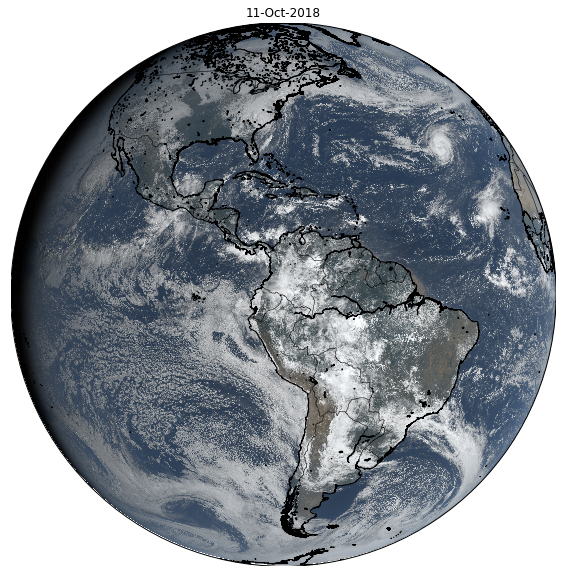

In [5]:
# goes_imager_projection
#--------------------------------------------------------------------------------------
# Altura del satélite
sat_h = ncfile.variables['goes_imager_projection'].perspective_point_height
# Satellite longitude
sat_lon = ncfile.variables['goes_imager_projection'].longitude_of_projection_origin
# Satellite sweep
sat_sweep = ncfile.variables['goes_imager_projection'].sweep_angle_axis

# geospatial_lat_lon_extent
#--------------------------------------------------------------------------------------
lon_0 = ncfile.variables["geospatial_lat_lon_extent"].geospatial_lon_center
lat_0 = ncfile.variables["geospatial_lat_lon_extent"].geospatial_lat_center
print("Altura sat = ",sat_lon)
print("lon sat = ", lon_0)
print("lat sat = ", lat_0)

plt.figure(figsize=[12, 10])
m = Basemap(projection='geos',
			   lon_0=lon_0,
			   lat_0=lat_0, 
			   satellite_height=sat_h, 
			   ellps='GRS80', 
			   resolution='h'
			   )
 
m.imshow(np.flipud(RGB)) # Remember, "images" are upside down, so flip up/down
m.drawcoastlines()
m.drawcountries()
plt.title(date)
plt.savefig("./graficos/goes16-global.png", format="png", dpi=150)
plt.show()

In [6]:
X = ncfile.variables['x'][:] * sat_h
Y = ncfile.variables['y'][:] * sat_h

In [7]:
# Convert map points to latitude and longitude with the magic provided by Pyproj
#--------------------------------------------------------------------------------------
XX, YY = np.meshgrid(X, Y)

#(http://proj4.org/projections/geos.html)
from pyproj import Proj 
p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)
lons, lats = p(XX, YY, inverse=True)

In [8]:
import atmocean as ao
# Perú
limit_lats = [-20.25, 5.25]     
limit_lons = [-90.25, -59.25]

# Sudamérica
#limit_lats = [-40.25, 15.25]    
#limit_lons = [-110.25, -33.75]


newDom=ao.subdominio(lons, lats, limit_lons, limit_lats, R)
idxlat, idxlon = newDom.getIndexSubDom()
print(idxlat,"\n", idxlon)

newR = R[idxlat[1]:idxlat[0], idxlon[0]:idxlon[1]]
newG = G_true[idxlat[1]:idxlat[0], idxlon[0]:idxlon[1]]
newB = B[idxlat[1]:idxlat[0], idxlon[0]:idxlon[1]]

newlats = lats[idxlat[1]:idxlat[0], idxlon[0]:idxlon[1]]
newlons = lons[idxlat[1]:idxlat[0], idxlon[0]:idxlon[1]]

[3787, 2424] 
 [1941, 3565]


(1363, 1624, 3)


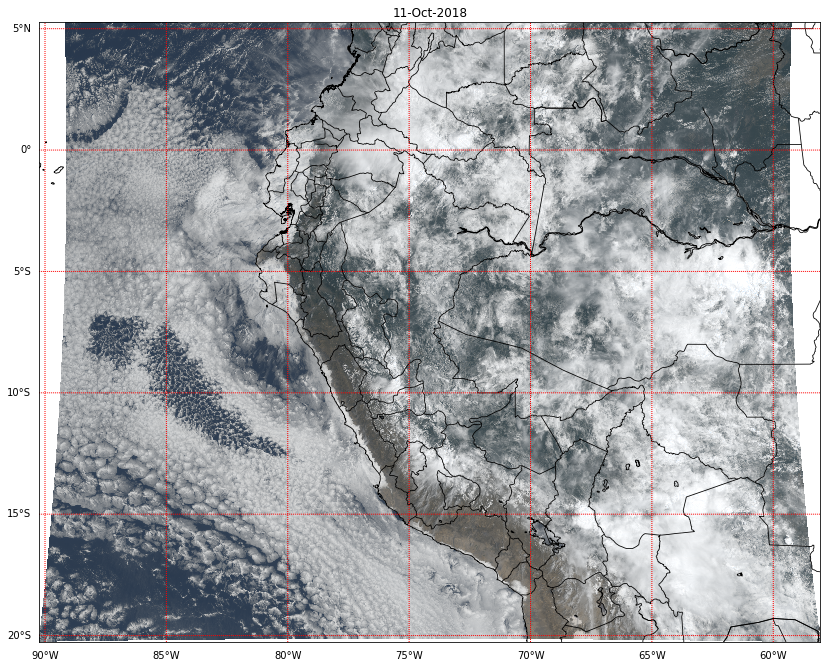

In [16]:
newRGB = np.dstack([newR, newG, newB])
print(newRGB.shape)

m = Basemap(llcrnrlat = newlats.min(), 
            urcrnrlat = newlats.max(),
            urcrnrlon = newlons.max(),
            llcrnrlon = newlons.min(), 
            projection = 'cyl', 
            resolution="h")
x, y = m(newlons, newlats)

# Crear la tupla de  colores para pcolormesh
rgb = newRGB[:,:-1,:] # Usar una columna menos es muy importante, de lo contrario, tu imagen se mezclará.
                      # (Esta es la naturaleza extraña de pcolormesh)
rgb = np.minimum(rgb, 1) # Forzar que el valor RGB máximo posible sea 1 (el más bajo debería ser 0).
colorTuple = rgb.reshape((rgb.shape[0] * rgb.shape[1]), 3) # redimensionar la matriz, porque eso es lo que quiere pcolormesh.
colorTuple = np.insert(colorTuple, 3, 1.0, axis=1) 

plt.figure(figsize=(14, 12))
im1 = m.pcolormesh(x, y, newR, color=colorTuple, linewidth=0, latlon=True)
im1.set_array(None)

m.drawcoastlines(linewidth=0.8, linestyle='solid', color="k")
m.drawcountries(linewidth=0.8, linestyle='solid',color="k")
m.drawstates(linewidth=0.8, linestyle='solid', color="k")
m.drawmeridians(np.arange(-120,0,5), labels=[0,0,0,1], color="r")
m.drawparallels(np.arange(-20,13,5), labels=[1,0,0,0], color="r")

plt.title(date)
plt.savefig("./graficos/goes16-peru.png", format="png", dpi=150)
plt.show()


In [10]:
a=np.arange(15).reshape(3,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [11]:
fn = np.where(a == 8)
print(fn)

(array([1]), array([3]))


In [12]:
lat=np.arange(-5,7)
lon=np.arange(-90,-80)

In [13]:
print(lat)
print(lon)

[-5 -4 -3 -2 -1  0  1  2  3  4  5  6]
[-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]


In [14]:
lons, lats =np.meshgrid(lon, lat)
print(lats)
print(lats.shape)
print(lons)
print(lons.shape)

[[-5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [-4 -4 -4 -4 -4 -4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]]
(12, 10)
[[-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]
 [-90 -89 -88 -87 -86 -85 -84 -83 -82 -81]]
(12, 10)


In [15]:
print(a)
colorTuple = np.insert(a, 5, 1.0, axis=1)
print("\n",colorTuple)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

 [[ 0  1  2  3  4  1]
 [ 5  6  7  8  9  1]
 [10 11 12 13 14  1]]
